In [3]:
%ls

Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
body.jpg
body1.jpg
body2.jpg
competitive-data-science-predict-future-sales.ipynb
data.csv
data.txt
data2.csv
image.png
stats_model_oLS.ipynb


## import libraty

In [101]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2
import warnings
import copy
warnings.filterwarnings("ignore")

In [102]:
def separate_image(img_input):
    body = cv2.imread(img_input)
    # print(f"image_info: {body}")
    print(f"image_size: {body.size}")
    print(f"type of body: {type(body)}")
    print(f"shape of body: {body.shape}")
    print(f"record_num: {len(body)}")
    body1 = np.empty([570, 570, 3])
    body2 = np.empty([570, 570, 3])
    
    plt.imshow(cv2.cvtColor(body, cv2.COLOR_BGR2RGB))
    plt.show()
    
    for i in range(560 - 1):
        for j in range(570):
            body1[j][i] = body[j][i+38]
    for i in range(560 - 1):
        for j in range(570):
            body2[j][i] = body[j][i+600]

    print(f"type of body1: {type(body1)}")
    cv2.imwrite("body1.jpg", body1)
    body1 = cv2.imread("body1.jpg")
    plt.imshow(cv2.cvtColor(body1, cv2.COLOR_BGR2RGB))
    plt.show()

    print(f"type of body2: {type(body2)}")
    cv2.imwrite("body2.jpg", body2)
    body2 = cv2.imread("body2.jpg")
    plt.imshow(cv2.cvtColor(body2, cv2.COLOR_BGR2RGB))
    plt.show()
    return body1, body2

image_size: 2052000
type of body: <class 'numpy.ndarray'>
shape of body: (570, 1200, 3)
record_num: 570


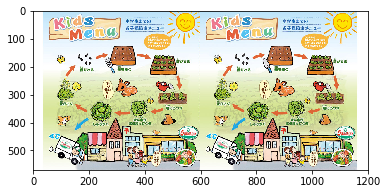

type of body1: <class 'numpy.ndarray'>


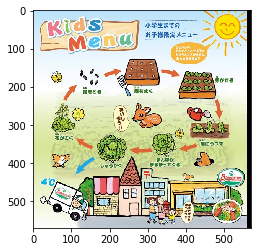

type of body2: <class 'numpy.ndarray'>


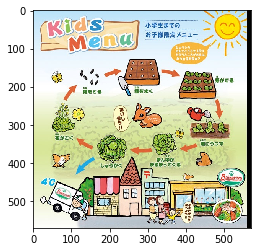

In [103]:
body1, body2 = separate_image("body.jpg")

In [104]:
diff = cv2.absdiff(body1, body2)

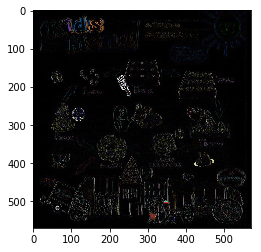

In [105]:
plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
plt.show()

In [108]:
def make_heatmap(img_input):
    img = copy.deepcopy(img_input)
    
    l_x = 10
    l_y = 10
    x = int(np.shape(img)[0]/l_x)
    y = int(np.shape(img)[1]/l_y)
    array = np.zeros((l_x, l_y))
    for i in range(np.shape(img)[0]):
        for j in range(np.shape(img)[1]):
            # print(type(img[i][j]))
            # print(img[i][j])
            if np.linalg.norm(img[i][j]) < 70:
                img[i][j] = 0
                
    for i in range(l_x):
        for j in range(l_y):
            array[i][j] = np.sum(img[i*x: (i+1)*x-1, j*y: (j+1)*y-1])
    array = array[::-1][::1]
    
    fig, ax = plt.subplots()
    fig = plt.figure(figsize=(57,57), dpi=10)
    ax.tick_params(labelbottom="off", bottom="off")
    ax.tick_params(labelleft="off", left="off")
    ax.set_xticklabels([])
    # box("off")
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
    
    plt.pcolor(array, cmap=plt.cm.Reds)
    plt.savefig("heatmap.png")

NameError: name 'box' is not defined

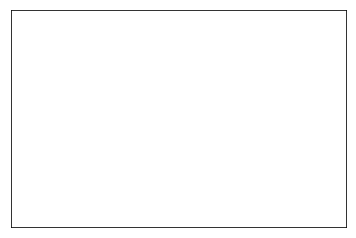

<Figure size 570x570 with 0 Axes>

In [109]:
# print(diff)
make_heatmap(diff)